In [ ]:
# importing all  necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,classification_report

In [ ]:
# function for calculating classification matrix and printing it
# printing confusion matrix
def calculate_performance(y_true,y_pred):
  print("CLASSIFICATION REPORT\n"+"-"*21)
  print(classification_report(y_true,y_pred))
  print("\nCONFUSION MATRIX\n"+"-"*16)
  cm = confusion_matrix(y_true,y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.show()

In [ ]:
# importing the data extracted from binary files
df = pd.read_csv('/content/drive/MyDrive/datasets/Assignments/ELF_data/features.csv')
df.head(4)

,name,Entry_point_address,Size_of_program_headers,Size_of_section_headers,Start_of_program_headers,Start_of_section_headers,size_text_section,total_size_file,total_size_memory,n_seg_diff_size_in_file_and_memory,n_p_type_header_as_int_type,total_p_flags,total_STT_NOTYPE_symbol,total_STT_FUNC_symbol,total_STT_OBJECT_symbol,n_sec_not_in_memory,total_global_symbols,total_local_symbols,total_weak_symbols,category
0,printf,13472,56,64,64,57904,29874,53733,54165,1,0,59,4,0,0,0,58,1,6,0
1,pr,12896,56,64,64,78480,42610,77981,78685,1,0,59,4,0,0,0,78,1,6,0
2,ppdhtml,17520,56,64,64,111136,61765,106603,106619,1,0,59,4,0,0,0,59,1,4,0
3,png-fix-itxt,5296,56,64,64,12728,1365,6561,6593,1,0,59,4,0,0,0,7,1,4,0


## Preparing the data

In [ ]:
data = df.drop(axis = 1, columns = ['name']) # name of the file is not relevant so remove it 
features = list(data.columns[:-1])           # list of features 
print("Features using for classification:\n"+'-'*34)
print('Total: {}'.format(len(features)))
for f in features:
  print(f)


# define X and y and split data into train and test
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Features using for classification:
----------------------------------
Total: 18
Entry_point_address
Size_of_program_headers
Size_of_section_headers
Start_of_program_headers
Start_of_section_headers
size_text_section
total_size_file
total_size_memory
n_seg_diff_size_in_file_and_memory
n_p_type_header_as_int_type
total_p_flags
total_STT_NOTYPE_symbol
total_STT_FUNC_symbol
total_STT_OBJECT_symbol
n_sec_not_in_memory
total_global_symbols
total_local_symbols
total_weak_symbols


## Model Selection

**1. Guassian NB**

PERFORMANCE ON TRAIN DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       327
           1       0.98      0.71      0.82       352

    accuracy                           0.84       679
   macro avg       0.87      0.85      0.84       679
weighted avg       0.88      0.84      0.84       679


CONFUSION MATRIX
----------------


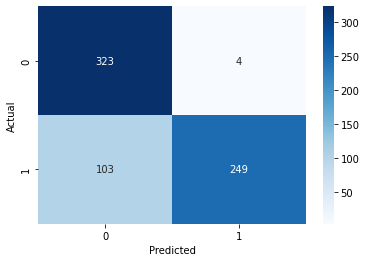

In [ ]:
# instantiate decision tree classifier
clf = MultinomialNB()
clf.fit(X_train, y_train)
print('PERFORMANCE ON TRAIN DATA\n'+'='*55)
y_pred = clf.predict(X_train)
calculate_performance(y_train,y_pred)


PERFORMANCE ON TEST DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       0.76      0.99      0.86       143
           1       0.98      0.70      0.82       148

    accuracy                           0.84       291
   macro avg       0.87      0.84      0.84       291
weighted avg       0.87      0.84      0.84       291


CONFUSION MATRIX
----------------


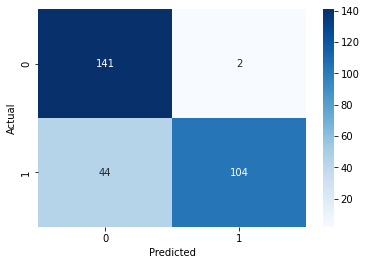

In [ ]:
print('\nPERFORMANCE ON TEST DATA\n'+'='*55)
y_pred = clf.predict(X_test)
calculate_performance(y_test,y_pred)

**2. BernoulliNB**

PERFORMANCE ON TRAIN DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       327
           1       1.00      0.95      0.98       352

    accuracy                           0.97       679
   macro avg       0.98      0.98      0.97       679
weighted avg       0.98      0.97      0.97       679


CONFUSION MATRIX
----------------


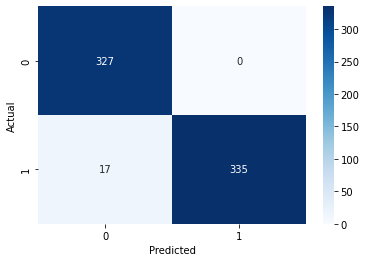

In [ ]:
# instantiate decision tree classifier
clf = BernoulliNB()
clf.fit(X_train, y_train)
print('PERFORMANCE ON TRAIN DATA\n'+'='*55)
y_pred = clf.predict(X_train)
calculate_performance(y_train,y_pred)


PERFORMANCE ON TEST DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       143
           1       0.99      0.97      0.98       148

    accuracy                           0.98       291
   macro avg       0.98      0.98      0.98       291
weighted avg       0.98      0.98      0.98       291


CONFUSION MATRIX
----------------


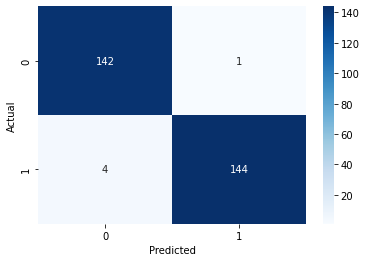

In [ ]:
print('\nPERFORMANCE ON TEST DATA\n'+'='*55)
y_pred = clf.predict(X_test)
calculate_performance(y_test,y_pred)

**3. Support Vector Machines**

PERFORMANCE ON TRAIN DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       0.59      1.00      0.74       327
           1       1.00      0.36      0.53       352

    accuracy                           0.67       679
   macro avg       0.80      0.68      0.64       679
weighted avg       0.80      0.67      0.64       679


CONFUSION MATRIX
----------------


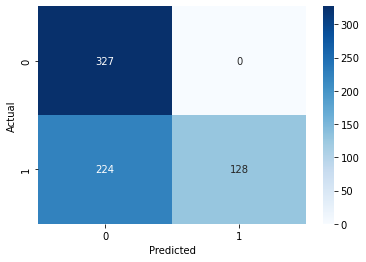

In [ ]:
# instantiate decision tree classifier
clf = SVC()
clf.fit(X_train, y_train)
print('PERFORMANCE ON TRAIN DATA\n'+'='*55)
y_pred = clf.predict(X_train)
calculate_performance(y_train,y_pred)


PERFORMANCE ON TEST DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       143
           1       1.00      0.36      0.53       148

    accuracy                           0.67       291
   macro avg       0.80      0.68      0.64       291
weighted avg       0.80      0.67      0.64       291


CONFUSION MATRIX
----------------


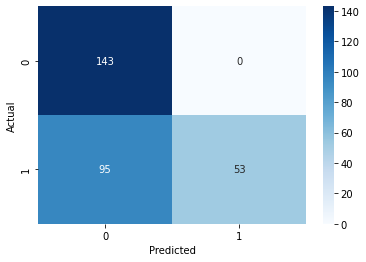

In [ ]:
print('\nPERFORMANCE ON TEST DATA\n'+'='*55)
y_pred = clf.predict(X_test)
calculate_performance(y_test,y_pred)

**4. Decision Tree**

PERFORMANCE ON TRAIN DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       352

    accuracy                           1.00       679
   macro avg       1.00      1.00      1.00       679
weighted avg       1.00      1.00      1.00       679


CONFUSION MATRIX
----------------


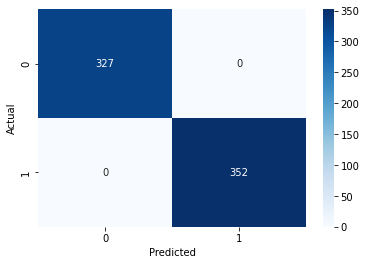

In [ ]:
# instantiate decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print('PERFORMANCE ON TRAIN DATA\n'+'='*55)
y_pred = clf.predict(X_train)
calculate_performance(y_train,y_pred)


PERFORMANCE ON TEST DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       148

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291


CONFUSION MATRIX
----------------


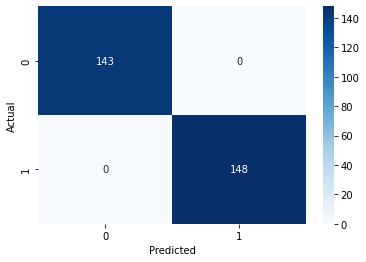

In [ ]:
print('\nPERFORMANCE ON TEST DATA\n'+'='*55)
y_pred = clf.predict(X_test)
calculate_performance(y_test,y_pred)

Observation:
- Decision tree giving good accuracy

## Feature Selection with Decision Tree feature importance

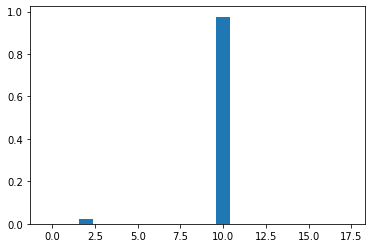

In [ ]:
# retrive feature importance and plot it 
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
importance = clf.feature_importances_
x = range(0, len(features))
plt.bar(x,importance)
plt.show()

In [ ]:
imp_features = []
print('Important features:\n'+'-'*19)
for feature, imp in zip(features, importance):
  if imp > 0:
    imp_features.append(feature)
    print(feature)

Important features:
-------------------
Entry_point_address
Size_of_section_headers
total_p_flags


## Classification with new set of features

PERFORMANCE ON TRAIN DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       327
           1       1.00      1.00      1.00       352

    accuracy                           1.00       679
   macro avg       1.00      1.00      1.00       679
weighted avg       1.00      1.00      1.00       679


CONFUSION MATRIX
----------------


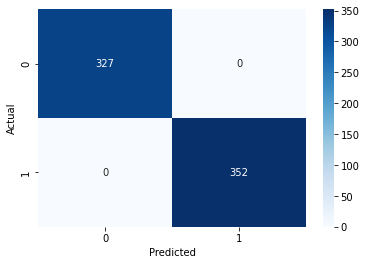

In [ ]:
# train with new features and calculate accuracy with test data
X = data.loc[:,imp_features]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# training the classifier and calculating performance
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print('PERFORMANCE ON TRAIN DATA\n'+'='*55)
y_pred = clf.predict(X_train)
calculate_performance(y_train,y_pred)


PERFORMANCE ON TEST DATA
CLASSIFICATION REPORT
---------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       1.00      1.00      1.00       148

    accuracy                           1.00       291
   macro avg       1.00      1.00      1.00       291
weighted avg       1.00      1.00      1.00       291


CONFUSION MATRIX
----------------


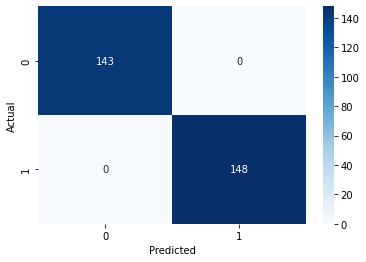

In [ ]:
print('\nPERFORMANCE ON TEST DATA\n'+'='*55)
y_pred = clf.predict(X_test)
calculate_performance(y_test,y_pred)